In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data=pd.read_csv('C:/Users/icear/Desktop/DACON/아파트 실거래가격 예측/train.csv')
test_data=pd.read_csv('C:/Users/icear/Desktop/DACON/아파트 실거래가격 예측/test.csv')

# Data 체크

In [3]:
train_data.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000


In [4]:
train_data.info(),test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216553 entries, 0 to 1216552
Data columns (total 13 columns):
transaction_id            1216553 non-null int64
apartment_id              1216553 non-null int64
city                      1216553 non-null object
dong                      1216553 non-null object
jibun                     1216553 non-null object
apt                       1216553 non-null object
addr_kr                   1216553 non-null object
exclusive_use_area        1216553 non-null float64
year_of_completion        1216553 non-null int64
transaction_year_month    1216553 non-null int64
transaction_date          1216553 non-null object
floor                     1216553 non-null int64
transaction_real_price    1216553 non-null int64
dtypes: float64(1), int64(6), object(6)
memory usage: 120.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5463 entries, 0 to 5462
Data columns (total 12 columns):
transaction_id            5463 non-null int64
apartment_id             

(None, None)

In [5]:
train_data.isnull().sum(),test_data.isnull().sum()

(transaction_id            0
 apartment_id              0
 city                      0
 dong                      0
 jibun                     0
 apt                       0
 addr_kr                   0
 exclusive_use_area        0
 year_of_completion        0
 transaction_year_month    0
 transaction_date          0
 floor                     0
 transaction_real_price    0
 dtype: int64, transaction_id            0
 apartment_id              0
 city                      0
 dong                      0
 jibun                     0
 apt                       0
 addr_kr                   0
 exclusive_use_area        0
 year_of_completion        0
 transaction_year_month    0
 transaction_date          0
 floor                     0
 dtype: int64)

# EDA

Text(0.5, 1.0, 'transaction_real_price kdeplot')

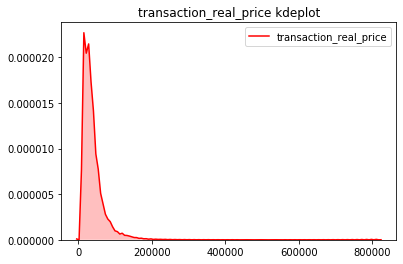

In [6]:
# transaction_real_price : 수치형
sns.kdeplot(train_data['transaction_real_price'],shade=True,color='r').set_title('transaction_real_price kdeplot')

In [7]:
train_data['transaction_real_price'].describe()

count    1.216553e+06
mean     3.822769e+04
std      3.104898e+04
min      1.000000e+02
25%      1.900000e+04
50%      3.090000e+04
75%      4.700000e+04
max      8.200000e+05
Name: transaction_real_price, dtype: float64

Text(0.5, 1.0, 'transaction_real_price QQ plot')

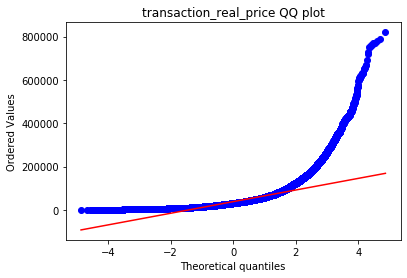

In [8]:
from scipy.stats import probplot
fig=plt.figure()
ax=fig.add_subplot(111)
probplot(train_data['transaction_real_price'],plot=ax)
ax.set_title('transaction_real_price QQ plot')

In [9]:
train_data['transaction_real_price']=np.log1p(train_data['transaction_real_price'])

Text(0.5, 1.0, 'log(transaction_real_price) kdeplot')

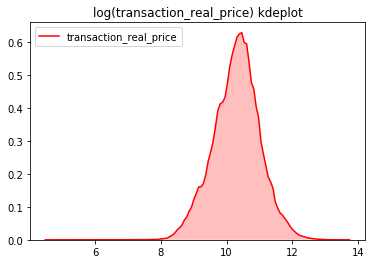

In [10]:
sns.kdeplot(train_data['transaction_real_price'],shade=True,color='r').set_title('log(transaction_real_price) kdeplot')

Text(0.5, 1.0, 'log(trainsaction_real_price) QQ plot')

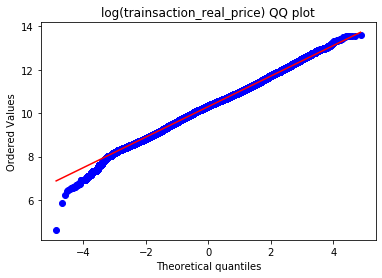

In [11]:
fig=plt.figure()
ax=fig.add_subplot(111)
probplot(train_data['transaction_real_price'],plot=ax)
ax.set_title('log(trainsaction_real_price) QQ plot')

In [12]:
# apartment_id  : 수치형
len(train_data['apartment_id'].unique())

12533

In [13]:
print('pure_apartment_id ratio :',len(train_data['apartment_id'].unique())/len(train_data['apartment_id'])*100,'%')

pure_apartment_id ratio : 1.0302058356684831 %


In [14]:
train_data_apt=train_data[['transaction_real_price','apartment_id']].groupby('apartment_id').count().sort_values('transaction_real_price',axis=0,ascending=False)

In [15]:
train_data_apt.head()

,transaction_real_price
apartment_id,
8415,3220
10939,3094
4449,2886
8031,2572
2120,2536


In [16]:
train_data[train_data['apartment_id']==8415].head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
764713,764713,8415,부산광역시,용호동,944,오륙도에스케이뷰,용호동 944 오륙도에스케이뷰,84.9636,2008,200904,11~20,19,10.184938
764715,764715,8415,부산광역시,용호동,944,오륙도에스케이뷰,용호동 944 오륙도에스케이뷰,122.2710,2008,200904,11~20,5,10.616952
765101,765101,8415,부산광역시,용호동,944,오륙도에스케이뷰,용호동 944 오륙도에스케이뷰,84.9636,2008,200905,1~10,19,10.165506
765102,765102,8415,부산광역시,용호동,944,오륙도에스케이뷰,용호동 944 오륙도에스케이뷰,84.9636,2008,200905,1~10,30,10.195821
765110,765110,8415,부산광역시,용호동,944,오륙도에스케이뷰,용호동 944 오륙도에스케이뷰,84.9636,2008,200905,1~10,9,10.134639


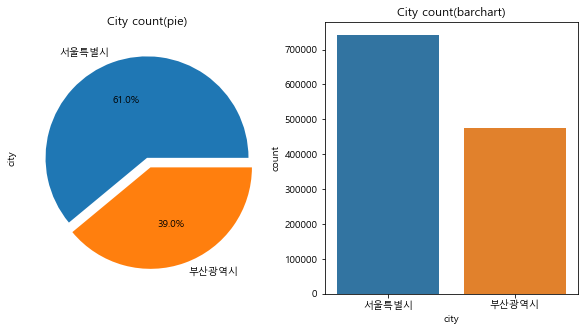

서울특별시    742285
부산광역시    474268
Name: city, dtype: int64

In [17]:
# city : 범주형
from matplotlib import font_manager,rc
font_location='C:/Windows/Fonts/malgun.ttf'
font_name=font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)
f,ax=plt.subplots(1,2,figsize=(10,5))
train_data['city'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0])
sns.countplot('city',data=train_data,ax=ax[1])
ax[0].set_title('City count(pie)')
ax[1].set_title('City count(barchart)')
plt.show()
train_data['city'].value_counts()

city
부산광역시     9.781791
서울특별시    10.639446
Name: transaction_real_price, dtype: float64


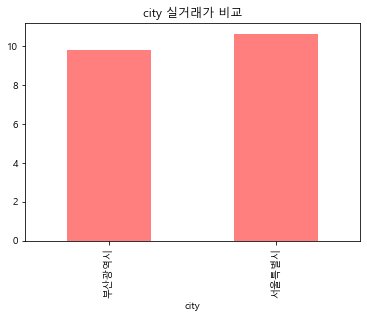

In [18]:
ax=train_data.groupby(['city'])['transaction_real_price'].mean().plot.bar(color='red',alpha=0.5)
ax.set_title('city 실거래가 비교')
print(train_data.groupby(['city'])['transaction_real_price'].mean())

In [19]:
train_data.groupby(['city'])['transaction_real_price'].describe()

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
부산광역시,474268.0,9.781791,0.594142,4.615121,9.392745,9.798183,10.184938,12.930689
서울특별시,742285.0,10.639446,0.550800,5.860786,10.275086,10.596660,10.968216,13.617061


In [20]:
# dong : 범주형
len(train_data['dong'].unique())

473

In [21]:
train_data_dong=train_data[['transaction_real_price','dong']].groupby('dong').mean().sort_values('transaction_real_price').reset_index()

In [22]:
train_data_dong.head()

,dong,transaction_real_price
0,신선동3가,8.543619
1,봉래동5가,8.590871
2,장안읍 명례리,8.597728
3,신창동2가,8.601466
4,신선동2가,8.622581


In [23]:
# jibun : 범주형
len(train_data['jibun'].unique())

8961

In [24]:
train_data_jibun=train_data[['transaction_real_price','jibun']].groupby('jibun').mean().sort_values('transaction_real_price')

In [25]:
train_data_jibun.head()

,transaction_real_price
jibun,
산3-148,7.225286
737-1,7.494417
741-1,7.498174
1181-4,7.585491
11-174,7.601402


In [26]:
# exclusive_use_area : 수치형
train_data['exclusive_use_area'].describe()

count    1.216553e+06
mean     7.816549e+01
std      2.915113e+01
min      9.260000e+00
25%      5.976000e+01
50%      8.241000e+01
75%      8.497000e+01
max      4.243200e+02
Name: exclusive_use_area, dtype: float64

Text(0.5, 1.0, 'exclusive_use_area histogram')

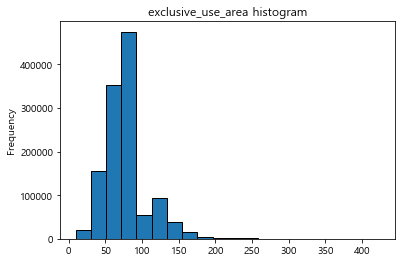

In [27]:
ax=train_data['exclusive_use_area'].plot.hist(edgecolor='black',bins=20)
x=list(range(0,450,50))
ax.set_xticks(x)
ax.set_title('exclusive_use_area histogram')

Text(0.5, 1.0, 'exclusive_use_area kdeplot')

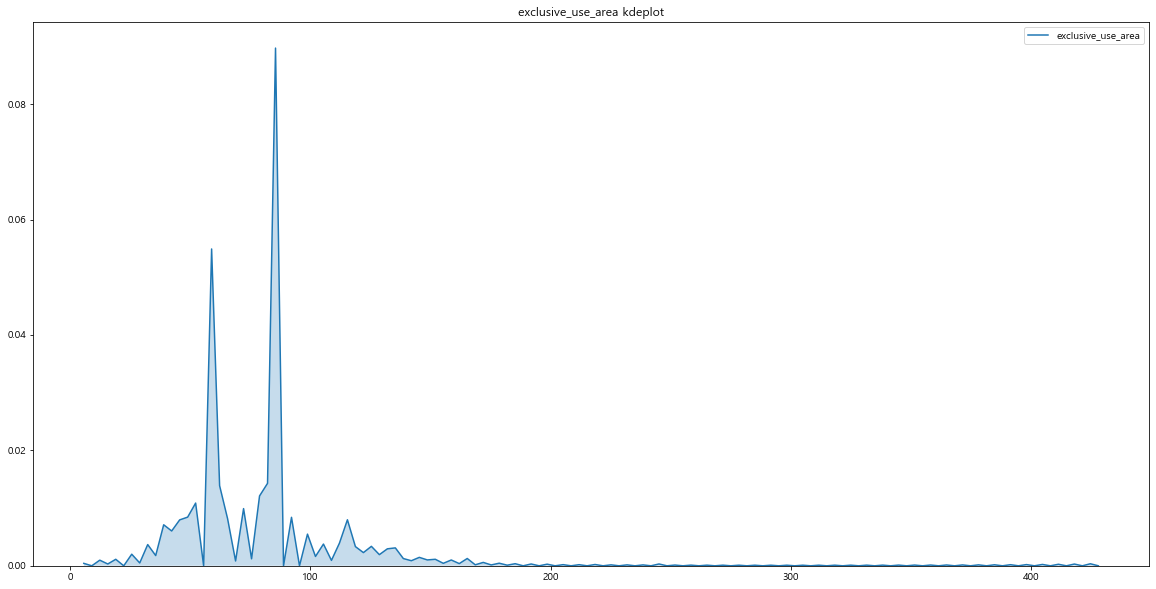

In [28]:
f,ax=plt.subplots(figsize=(20,10))
ax=sns.kdeplot(train_data['exclusive_use_area'],shade=True)
ax.set_title('exclusive_use_area kdeplot')

In [29]:
train_data['exclusive_use_area']=np.log1p(train_data['exclusive_use_area'])
test_data['exclusive_use_area']=np.log1p(test_data['exclusive_use_area'])

Text(0.5, 1.0, 'log(exclusive_use_area) kdeplot')

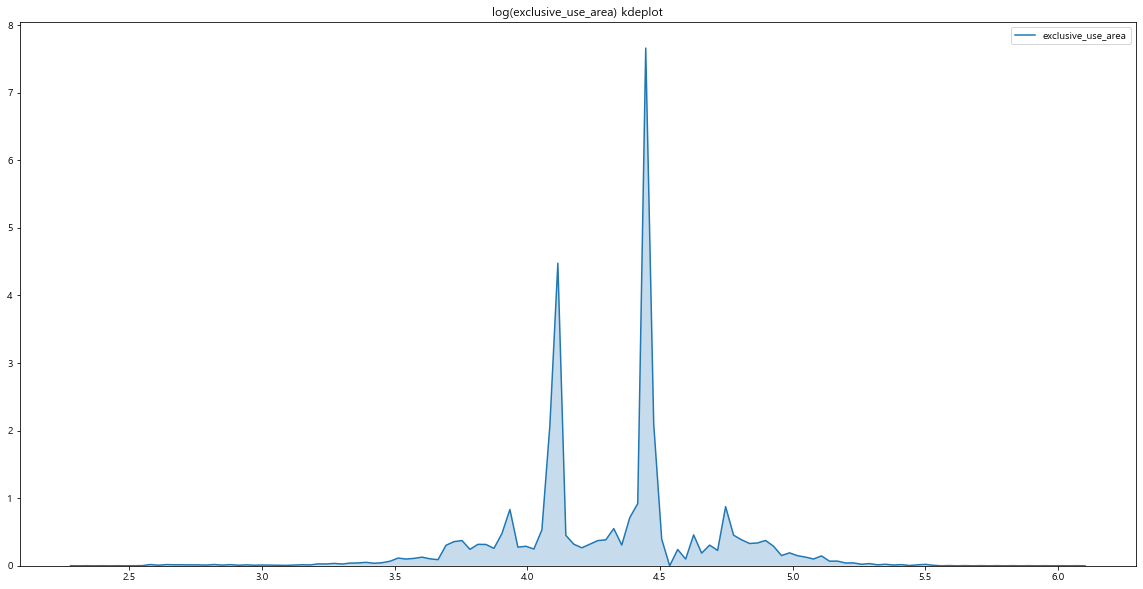

In [30]:
f,ax=plt.subplots(figsize=(20,10))
ax=sns.kdeplot(train_data['exclusive_use_area'],shade=True)
ax.set_title('log(exclusive_use_area) kdeplot')

Text(0.5, 1.0, 'exclusive_use_area,transaction_real_price scatterplot')

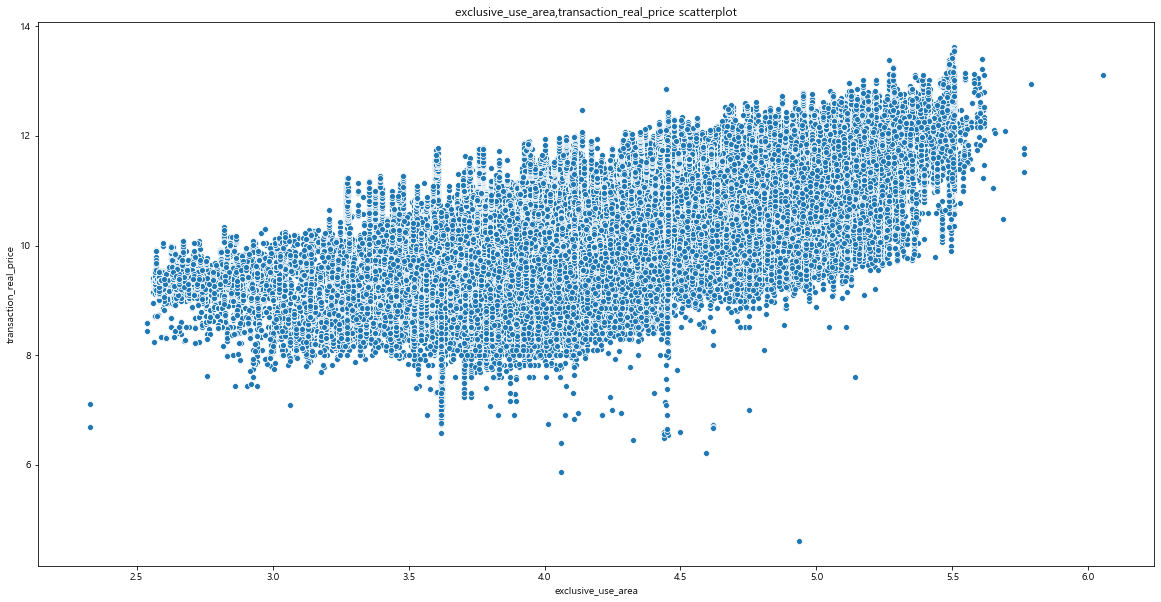

In [31]:
f,ax=plt.subplots(figsize=(20,10))
sns.scatterplot(train_data['exclusive_use_area'],train_data['transaction_real_price'],ax=ax)
ax.set_title('exclusive_use_area,transaction_real_price scatterplot')

In [32]:
# year_of_completion : 수치형
len(train_data['year_of_completion'].unique())

55

In [33]:
train_data_year_of_completion=train_data[['transaction_real_price','year_of_completion']].groupby('year_of_completion').count().sort_values('transaction_real_price',axis=0,ascending=False)

In [34]:
train_data_year_of_completion.head()

,transaction_real_price
year_of_completion,
2004,71809
2003,62520
2005,61832
1999,58578
1996,56892


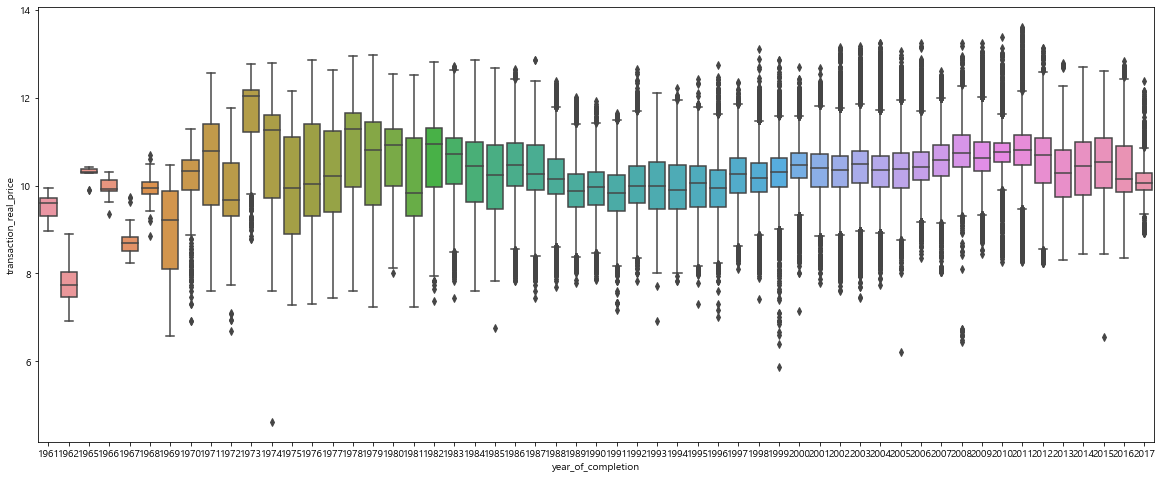

In [35]:
f,ax=plt.subplots(figsize=(20,8))
sns.boxplot(train_data['year_of_completion'],train_data['transaction_real_price'])

In [36]:
train_data[(train_data['year_of_completion']==1974)&(train_data['transaction_real_price']<6)]

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
722888,722888,6225,부산광역시,범전동,263-5,서면,범전동 263-5 서면,4.936271,1974,201606,21~30,-1,4.615121


In [37]:
train_data[(train_data['year_of_completion']==2005)&(train_data['transaction_real_price']<8)]

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
492126,492126,3928,서울특별시,서초동,1471-5,로얄하이츠,서초동 1471-5 로얄하이츠,4.593715,2005,200802,11~20,6,6.216606


In [38]:
train_data[(train_data['year_of_completion']==2008)&(train_data['transaction_real_price']<8)]

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
243214,243214,7631,서울특별시,구산동,199-24,신호(199-24),구산동 199-24 신호(199-24),4.439116,2008,200812,1~10,6,6.566672
243215,243215,7631,서울특별시,구산동,199-24,신호(199-24),구산동 199-24 신호(199-24),4.620354,2008,200812,1~10,7,6.734592
243216,243216,7631,서울특별시,구산동,199-24,신호(199-24),구산동 199-24 신호(199-24),4.620354,2008,200812,1~10,6,6.710523
243217,243217,7631,서울특별시,구산동,199-24,신호(199-24),구산동 199-24 신호(199-24),4.439116,2008,200812,1~10,7,6.594413
243218,243218,7631,서울특별시,구산동,199-24,신호(199-24),구산동 199-24 신호(199-24),4.439116,2008,200812,1~10,2,6.493754
243219,243219,7631,서울특별시,구산동,199-24,신호(199-24),구산동 199-24 신호(199-24),4.620354,2008,200812,1~10,5,6.710523
243220,243220,7631,서울특별시,구산동,199-24,신호(199-24),구산동 199-24 신호(199-24),4.324000,2008,200812,1~10,11,6.447306
243221,243221,7631,서울특별시,구산동,199-24,신호(199-24),구산동 199-24 신호(199-24),4.620354,2008,200812,1~10,3,6.685861
243222,243222,7631,서울특별시,구산동,199-24,신호(199-24),구산동 199-24 신호(199-24),4.439116,2008,200812,1~10,10,6.566672
243223,243223,7631,서울특별시,구산동,199-24,신호(199-24),구산동 199-24 신호(199-24),4.620354,2008,200812,1~10,8,6.734592


In [39]:
train_data[(train_data['year_of_completion']==2015)&(train_data['transaction_real_price']<8)]

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
39137,39137,10875,서울특별시,하왕십리동,1066,텐즈힐아파트(1단지),하왕십리동 1066 텐즈힐아파트(1단지),4.453882,2015,201505,21~31,9,6.552508


In [40]:
for i in train_data:
    train_data['transaction_year_month']=train_data['transaction_year_month'].astype(str)
    train_data['transaction_year']=train_data['transaction_year_month'].str[:4].astype(int)
    train_data['transaction_month']=train_data['transaction_year_month'].str[4:6].astype(int)
    train_data['transaction_year_month']=train_data['transaction_year_month'].astype(int)
for i in test_data:
    test_data['transaction_year_month']=test_data['transaction_year_month'].astype(str)
    test_data['transaction_year']=test_data['transaction_year_month'].str[:4].astype(int)
    test_data['transaction_month']=test_data['transaction_year_month'].str[4:6].astype(int)
    test_data['transaction_year_month']=test_data['transaction_year_month'].astype(int)

In [41]:
train_data['transaction_year'],train_data['transaction_month']

(0          2008
 1          2008
 2          2008
 3          2008
 4          2008
            ... 
 1216548    2017
 1216549    2017
 1216550    2017
 1216551    2017
 1216552    2017
 Name: transaction_year, Length: 1216553, dtype: int32, 0           1
 1           1
 2           1
 3           1
 4           1
            ..
 1216548    11
 1216549    11
 1216550    11
 1216551    11
 1216552    11
 Name: transaction_month, Length: 1216553, dtype: int32)

Text(0.5, 1.0, 'trainsaction_year 별 transaction_real_price')

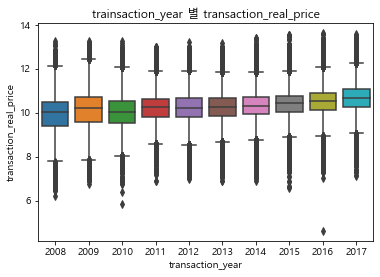

In [42]:
sns.boxplot(train_data['transaction_year'],train_data['transaction_real_price']).set_title('trainsaction_year 별 transaction_real_price')

In [43]:
train_data[(train_data['transaction_year']==2016)&(train_data['transaction_real_price']<6)]

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,transaction_year,transaction_month
722888,722888,6225,부산광역시,범전동,263-5,서면,범전동 263-5 서면,4.936271,1974,201606,21~30,-1,4.615121,2016,6


In [44]:
(train_data[(train_data['transaction_year']==2016)&(train_data['transaction_real_price']<6)])==(train_data[(train_data['year_of_completion']==1974)&(train_data['transaction_real_price']<6)])

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,transaction_year,transaction_month
722888,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


Text(0.5, 1.0, 'trainsaction_month 별 transaction_real_price')

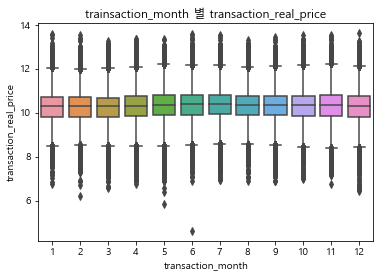

In [45]:
sns.boxplot(train_data['transaction_month'],train_data['transaction_real_price']).set_title('trainsaction_month 별 transaction_real_price')

In [46]:
# transation_date : 범주형
train_data['transaction_date'].unique()

array(['21~31', '1~10', '11~20', '21~29', '21~30', '21~28'], dtype=object)

Text(0.5, 1.0, 'transaction_date,transaction_real_price')

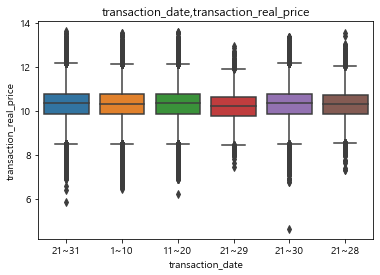

In [47]:
sns.boxplot(train_data['transaction_date'],train_data['transaction_real_price']).set_title('transaction_date,transaction_real_price')

In [48]:
train_data.groupby(['transaction_date'])['transaction_real_price'].describe()

,count,mean,std,min,25%,50%,75%,max
transaction_date,,,,,,,,
11~20,408385.0,10.306731,0.703062,6.216606,9.852247,10.341775,10.757924,13.579789
1~10,391715.0,10.293390,0.704828,6.447306,9.839002,10.325515,10.747229,13.541075
21~28,22199.0,10.286294,0.685444,7.313887,9.836332,10.308986,10.714440,13.554147
21~29,9649.0,10.176453,0.678033,7.438972,9.746892,10.199919,10.609082,12.948012
21~30,134017.0,10.321062,0.711398,4.615121,9.857496,10.344995,10.778977,13.353477
21~31,250588.0,10.318796,0.709150,5.860786,9.857496,10.343628,10.776892,13.617061


In [49]:
# floor : 수치형
train_data['floor'].describe()

count    1.216553e+06
mean     9.343291e+00
std      6.606500e+00
min     -4.000000e+00
25%      4.000000e+00
50%      8.000000e+00
75%      1.300000e+01
max      8.000000e+01
Name: floor, dtype: float64

Text(0.5, 1.0, 'floor,transaction_real_price')

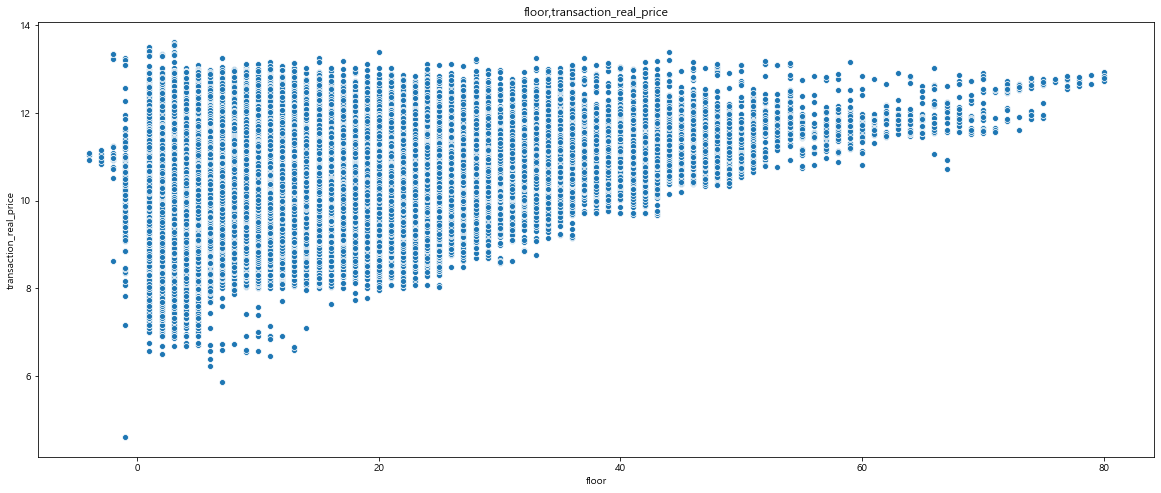

In [50]:
f,ax=plt.subplots(figsize=(20,8))
ax=sns.scatterplot(train_data['floor'],train_data['transaction_real_price'])
ax.set_title('floor,transaction_real_price')

# 전처리

In [51]:
# 라벨링
city_lable={'서울특별시':0,'부산광역시':1}
train_data=train_data.replace({'city':city_lable})
test_data=test_data.replace({'city':city_lable})
dong_lable={}
for i in range(len(train_data_dong)):
    dong=train_data_dong['dong'].iloc[i]
    dong_lable[dong] = i
train_data=train_data.replace({'dong':dong_lable})
test_data=test_data.replace({'dong':dong_lable})
train_data=train_data.drop(['jibun','apt','addr_kr','transaction_year_month'],axis=1)
test_data=test_data.drop(['jibun','apt','addr_kr','transaction_year_month'],axis=1)
date_lable={'1~10':0,'11~20':1,'21~28':2,'21~29':3,'21~30':4,'21~31':5}
train_data=train_data.replace({'transaction_date':date_lable})
test_data=test_data.replace({'transaction_date':date_lable})
train_data['floor_label']=0
train_data.loc[train_data['floor']<=17,'floor_label']=0
train_data.loc[(train_data['floor']>17)&(train_data['floor']<=38),'floor_label']=1
train_data.loc[(train_data['floor']>38)&(train_data['floor']<=59),'floor_label']=2
train_data.loc[train_data['floor']>59,'floor_label']=3
test_data['floor_label']=0
test_data.loc[test_data['floor']<=17,'floor_label']=0
test_data.loc[(test_data['floor']>17)&(test_data['floor']<=38),'floor_label']=1
test_data.loc[(test_data['floor']>38)&(test_data['floor']<=59),'floor_label']=2
test_data.loc[test_data['floor']>59,'floor_label']=3


In [52]:
train_data.corr()['transaction_real_price']

transaction_id           -0.241159
apartment_id              0.019817
city                     -0.592922
dong                      0.776511
exclusive_use_area        0.567649
year_of_completion        0.149384
transaction_date          0.012872
floor                     0.121215
transaction_real_price    1.000000
transaction_year          0.260628
transaction_month         0.022446
floor_label               0.080393
Name: transaction_real_price, dtype: float64

# feature engineering

In [53]:
# 아파트 나이
train_data['term']=train_data['transaction_year']-train_data['year_of_completion']
test_data['term']=train_data['transaction_year']-train_data['year_of_completion']

In [54]:
train_data.groupby(['term','transaction_real_price'])['term'].mean()

term  transaction_real_price
-1    9.680406                  -1
      9.770013                  -1
      9.852247                  -1
 0    6.447306                   0
      6.493754                   0
                                ..
 55   8.748464                  55
      8.810012                  55
      8.824825                  55
      9.741027                  55
      9.878221                  55
Name: term, Length: 92442, dtype: int64

In [55]:
train_data[train_data['term']==-1]

,transaction_id,apartment_id,city,dong,exclusive_use_area,year_of_completion,transaction_date,floor,transaction_real_price,transaction_year,transaction_month,floor_label,term
134850,134850,6545,0,267,4.243842,2009,0,8,9.680406,2008,6,0,-1
134999,134999,6545,0,267,4.243842,2009,0,8,9.770013,2008,8,0,-1
135026,135026,6545,0,267,4.243842,2009,1,9,9.852247,2008,8,0,-1


Text(0.5, 1.0, 'term QQ plot')

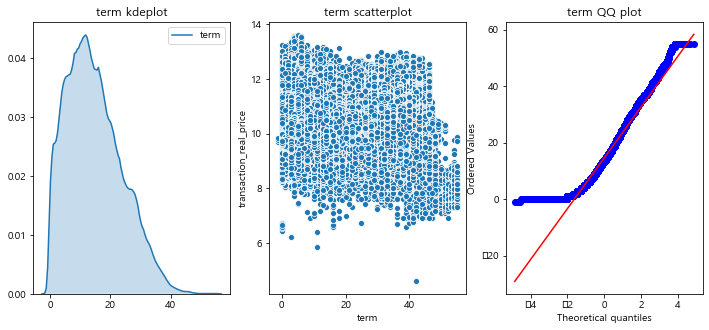

In [56]:
f,ax=plt.subplots(1,3,figsize=(12,5))
sns.kdeplot(train_data['term'],shade=True,ax=ax[0])
ax[0].set_title('term kdeplot')
sns.scatterplot(train_data['term'],train_data['transaction_real_price'],ax=ax[1])
ax[1].set_title('term scatterplot')
probplot(train_data['term'],plot=ax[2])
ax[2].set_title('term QQ plot')

In [57]:
train_data.corr()['transaction_real_price']

transaction_id           -0.241159
apartment_id              0.019817
city                     -0.592922
dong                      0.776511
exclusive_use_area        0.567649
year_of_completion        0.149384
transaction_date          0.012872
floor                     0.121215
transaction_real_price    1.000000
transaction_year          0.260628
transaction_month         0.022446
floor_label               0.080393
term                     -0.063295
Name: transaction_real_price, dtype: float64

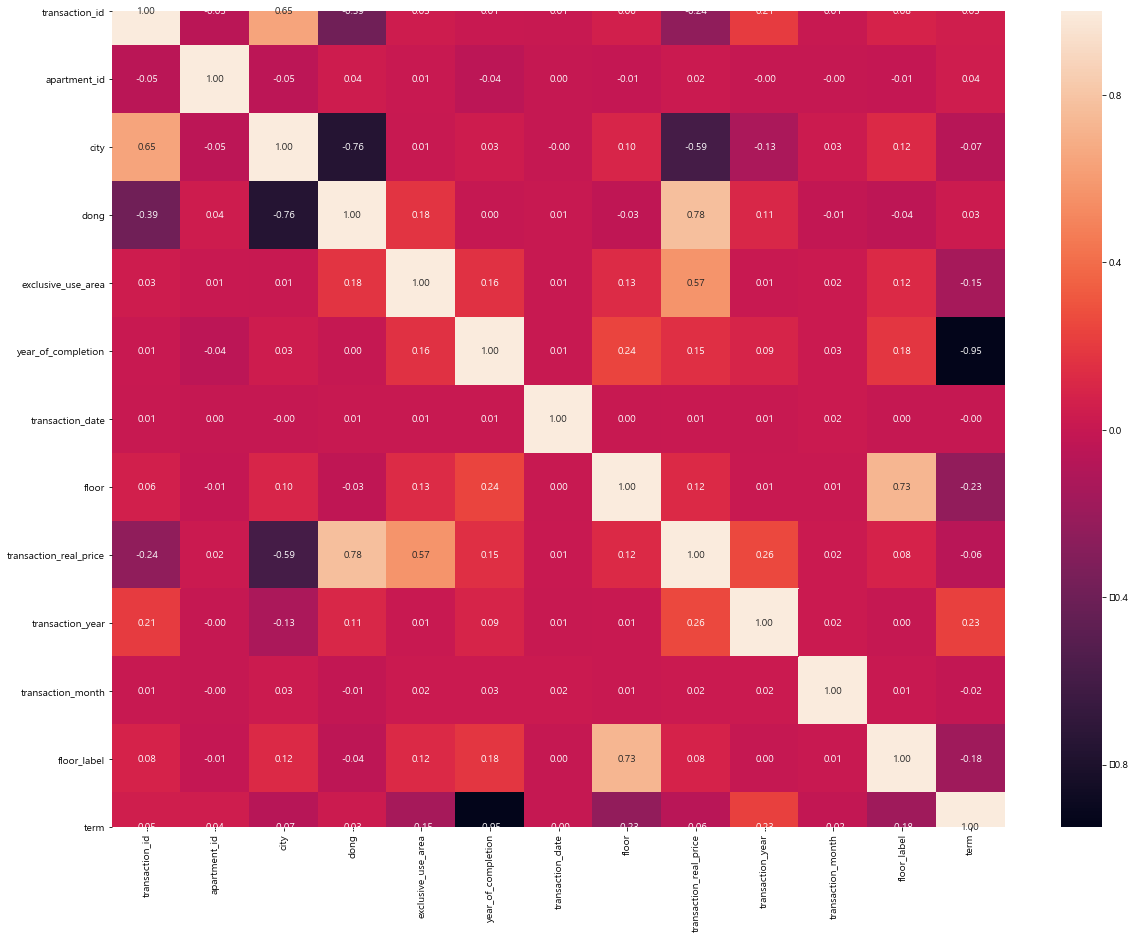

In [71]:
sns.heatmap(train_data.corr(),annot=True,fmt='.2f')
fig=plt.gcf()
fig.set_size_inches(20,15)